In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
import tensorflow as tf
from keras import layers, models, datasets
from matplotlib import pyplot as plt 
import numpy as np

In [3]:
(X_train, y_train), (X_test,y_test) = datasets.mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_train.max()

255

In [6]:
X_train = X_train /255.0
X_test = X_test /255.0

In [7]:
X_train.max()

1.0

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '5')

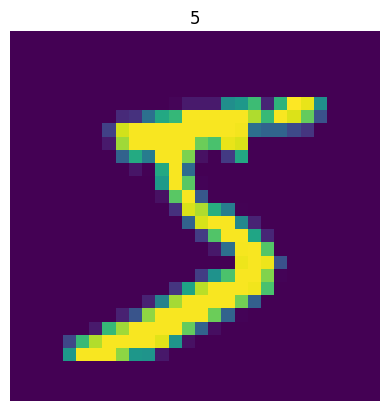

In [8]:
i = 0
plt.imshow(X_train[i])
plt.axis('off')
plt.title(y_train[i])

In [9]:
X_train = X_train.reshape(X_train.shape[0],28*28)

In [10]:
X_test = X_test.reshape(X_test.shape[0],28*28)

In [11]:
X_train.shape
X_test.shape

(60000, 784)

(10000, 784)

## AutoEncoder Model

In [12]:
input_layer = layers.Input(shape=(X_train.shape[1],), name = 'input_layer')

latent_feature_layer = layers.Dense(32, 
                                    activation=None, 
                                    use_bias=False, 
                                    kernel_initializer='he_uniform', 
                                    name='bottleneck')(input_layer)
latent_feature_layer = layers.LeakyReLU(name = 'LeakyRelu')(latent_feature_layer)

# Define the output layer
output_layer = layers.Dense(X_train.shape[1], 
                            activation='sigmoid', 
                            use_bias=False, 
                            kernel_initializer='he_uniform', 
                            name='output_layer')(latent_feature_layer)

In [13]:
model = models.Model(inputs=input_layer, outputs=output_layer, name = 'autoencoder')

model.summary()

Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bottleneck (Dense)              │ (None, 32)             │        25,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ LeakyRelu (LeakyReLU)           │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 784)            │        25,088 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,176 (196.00 KB)

 Trainable params: 50,176 (196.00 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
encoder = models.Model(inputs = input_layer, outputs = latent_feature_layer, name = 'encoder')
encoder.summary()

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bottleneck (Dense)              │ (None, 32)             │        25,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ LeakyRelu (LeakyReLU)           │ (None, 32)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,088 (98.00 KB)

 Trainable params: 25,088 (98.00 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
decoder = models.Model(inputs = latent_feature_layer , outputs = output_layer, name = 'decoder')
decoder.summary()

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ keras_tensor_1CLONE             │ (None, 32)             │             0 │
│ (InputLayer)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 784)            │        25,088 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,088 (98.00 KB)

 Trainable params: 25,088 (98.00 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(loss = 'mse', optimizer = 'adam')

In [24]:
from tensorflow.keras.callbacks import ModelCheckpoint
import os

checkpoint_path = "checkpoints/VanillaAutoEncoder/cp-{epoch:04d}.weights.h5"
checkpoint_dir = os.path.dirname(checkpoint_path)

checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    save_freq='epoch',  # Saving every epoch
    verbose=1)


In [25]:
epochs = 20
batch_size = 128

training = 1  # Set to 0 when resuming training

if training:
    history = model.fit(
        X_train, X_train,
        batch_size=batch_size,
        epochs=epochs,
        callbacks=[checkpoint_callback],
        verbose=1
    )
    
# To resume training from the last checkpoint if training is set to 0
#training == 0
else:                                                
    latest_checkpoint = tf.train.latest_checkpoint(checkpoint_dir)
    
    if latest_checkpoint:
        model.load_weights(latest_checkpoint)
        print(f"Loaded model weights from {latest_checkpoint}")
    else:
        print("No checkpoint found, starting training from scratch.")
    training = 1  # Reset training to 1 to continue the training process


Epoch 1/20
457/469 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1125
Epoch 1: saving model to checkpoints/cp-0001.weights.h5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1114
Epoch 2/20
455/469 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0377
Epoch 2: saving model to checkpoints/cp-0002.weights.h5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0376
Epoch 3/20
458/469 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0292
Epoch 3: saving model to checkpoints/cp-0003.weights.h5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0292
Epoch 4/20
450/469 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0249
Epoch 4: saving model to checkpoints/cp-0004.weights.h5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0249
Epoch 5/20
467/469 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0223
Epoch 5: saving model to checkpoints/cp-0005.weights.h5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0223
Epoch 6/20
462/469 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0206
Epoch 6: saving model to checkpoints/c

Text(0.5, 1.0, 'loss while training autoencoder for epochs=20 and batch_size=128')

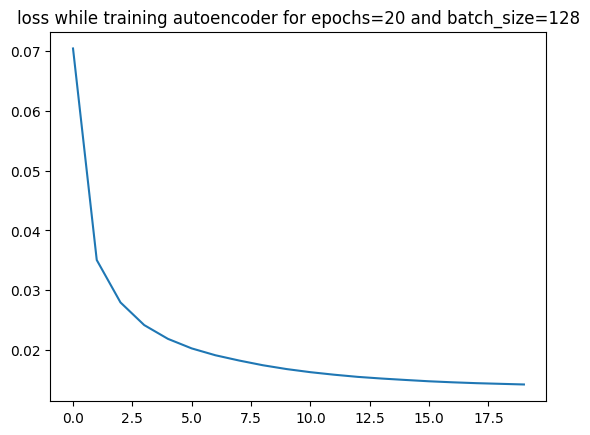

In [29]:
plt.plot(history.history['loss'])
plt.title(f"loss while training autoencoder for epochs={epochs} and batch_size={batch_size}")
plt.show()

## Prediction on Testing Data

In [30]:
batch_size = 256
encoded_data = encoder.predict(X_test, batch_size = batch_size)
encoded_data.shape     #shape should be same as latent_feature_layer i.e. 32

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


(10000, 32)

In [31]:
decoded_data = decoder.predict(encoded_data, batch_size = batch_size)
decoded_data.shape     #shape should be 784

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


(10000, 784)

## Reshaping the decoded data from flatten to images

In [32]:
output_data = decoded_data.reshape(decoded_data.shape[0],28,28)
output_data.shape

(10000, 28, 28)

In [34]:
X_test = X_test.reshape(X_test.shape[0],28,28)
X_test.shape

(10000, 28, 28)

Text(0.5, 1.0, 'Generated image')

(-0.5, 27.5, 27.5, -0.5)

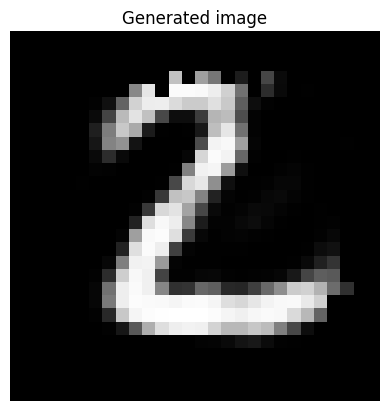

Text(0.5, 1.0, 'Testing image')

(-0.5, 27.5, 27.5, -0.5)

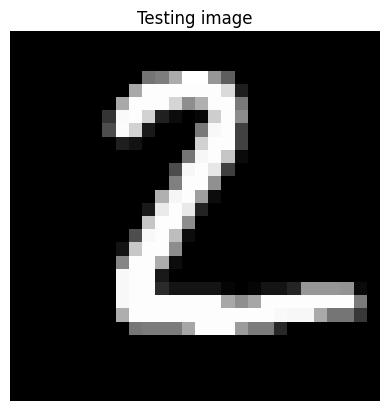

In [42]:
i = 1
plt.imshow(output_data[i], cmap = 'gray')
plt.title("Generated image")
plt.axis('off')
plt.show()
plt.imshow(X_test[i], cmap = 'gray')
plt.title("Testing image")
plt.axis('off')
plt.show()